$$
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
\def\com#1{\color{blue}{\textrm{#1}}} 
$$
# Lab 2: Uncertainties and Dimensions

- Submit your lab by dropping this notebook with your answers into `dropbox`. 

- __Rename your notebook to__ `Lab2_yourLoginName.ipynb` before submitting it by dragging it onto the dropbox folder. You can confirm submission (and resubmit up to the deadline), by repreating the process. If you are asked whether to replace the file, this confirms it has been successfully submitted to the dropbox. __Please confirm your submission__.

- __Due:__ 1pm Wednesday 11th March.

$\com{Please leave this command for marker's comments}$

In [ ]:
# Imports
import Pkg;
Pkg.add("Plots");
Pkg.add("Measurements");
Pkg.add("Roots");
Pkg.add("Unitful");
Pkg.add("QuadGK");
Pkg.add("PhysicalConstants");
Pkg.add("ForwardDiff");
Pkg.add("LaTeXStrings");

using Measurements;
using Plots;
using Roots;
using Unitful;
using QuadGK;
using PhysicalConstants.CODATA2018;
using ForwardDiff;
using LaTeXStrings;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...


# A. Vertical motion

1. The equation expressing the condition that $y(t) = h$ is $y(t) = - \frac{1}{2}gt^2 + v_0t  = h$. This condition in the form $F(t)=0$ is $F(t) =  - \frac{1}{2}gt^2 + v_0t - h = 0$ 


2. The roots of the equation are given by $\frac{-v_0 \ \pm \ \sqrt{v_0^2 - 2gh}}{-g}$. The physical constraints are that the initial velocity has to be greater than or equal to $\sqrt{2gh}$. This means that if the initial velocity of the ball is less than $\sqrt{2gh}$, the ball will not reach the given height, $h$.


3. The following constants are defined
```julia
g = 9.8 ± 0.014
m = 23 ± 0.0037
v_0 = 21 ± 0.1
h = 20 ± 0.4
y_0 = 0.0 ± 0.018
```


4. The roots are at approximately 1.5 and 2.8. The following code is used to generate a plot of $y(t)$ with uncertainties over time, $t$, along with a plot of a line of constant height, $h$, including its uncertainty.
```julia
thyme = collect(0:0.5:10) # Generate a vector with values from 0 to 10 in increments of 0.5
y(t) = -1/2*g*t^2 + v_0*t # Equation for y(t)
plot(y, [t ± 0.1 for t in thyme], size = (1200, 800), 
                                  legend=true, title = "Graph for A.4",
                                  label=L"y(t) = -0.5(gt^2) + v_0t") # Plot y(t) against time
plot!([h ± 0.4], seriestype="hline", label=L"y(t) = 20") # Line of constant height h
# Plot attributes
xlabel!(latexstring("\\mathrm{Time,} \\ t \\ (\\mathrm{s})"))
ylabel!(latexstring("\\mathrm{Height,} \\ h \\ (\\mathrm{m})"))
xlims!(0, 7)
ylims!(-20, 60)
```


5. The roots of $y(t)$ found using the quadratic formula including uncertainties are 1.429 ± 0.061 and 2.857 ± 0.071. The code below was used to determine the roots.
```julia
discriminant(a, b, c) = b^2 - 4*a*c # Find the discriminant of a quadratic equation
findRoots(a, b, c) = ( 1 / (2*a) ) * ( (-b) * [1, 1] + sqrt( discriminant(a, b, c) ) * [1, -1] ) # Find the roots of a quadratic equation
findRoots(-1/2*g, v_0, -h) # Find the roots of F(t) = 0
```


6. The equation of the curve in the form $F(t) = 0$ is $F(t) =  - \frac{1}{2}gt^2 + v_0t - h = 0$. The code below was used to generate a plot $F(t)$ against time, $t$. This approach is giving consistent results with the previous plot of $y(t)$ as the roots are approximately 1.5 and 2.8.
```julia
thyme = collect(0:0.5:10) # Generate a vector with values from 0 to 10 in increments of 0.5
F(t) = (-1/2) * g * t^2 + v_0 * t - h # Equation for F(t) = 0
plot(F, [t ± 0.1 for t in thyme], size = (1200, 800), 
                                  legend=true, 
                                  title = "Graph for A.6", 
                                  label = L"F(t) = -0.5(gt^2) + v_0t - h") # Plot F(t) = 0
# Plot attributes
xlabel!(latexstring("\\mathrm{Time,} \\ t \\ (\\mathrm{s})"))
ylabel!(latexstring("\\mathrm{Height,} \\ h \\ (\\mathrm{m})"))
xlims!(0, 7)
ylims!(-20, 60)
```


7. The solutions to $F(t) = 0$ found numerically are 1.429 ± 0.061 and 2.857 ± 0.071. The errors reported by the root finding algorithm agree with those found using the quadratic formula, as expected.
```julia
F(t) = -1/2*g*t^2 + v_0*t - h # Equation for F(t) = 0
numericalRoots = find_zero.(F, ((1 ± 0.1, 2 ± 0.1), (2.5 ± 0.1, 3 ± 0.1))) # Find the roots numerically
```

In [2]:
# Code for A.3
g = 9.8 ± 0.014;
m = 23 ± 0.0037;
v_0 = 21 ± 0.1;
h = 20 ± 0.4;
y_0 = 0.0 ± 0.018;

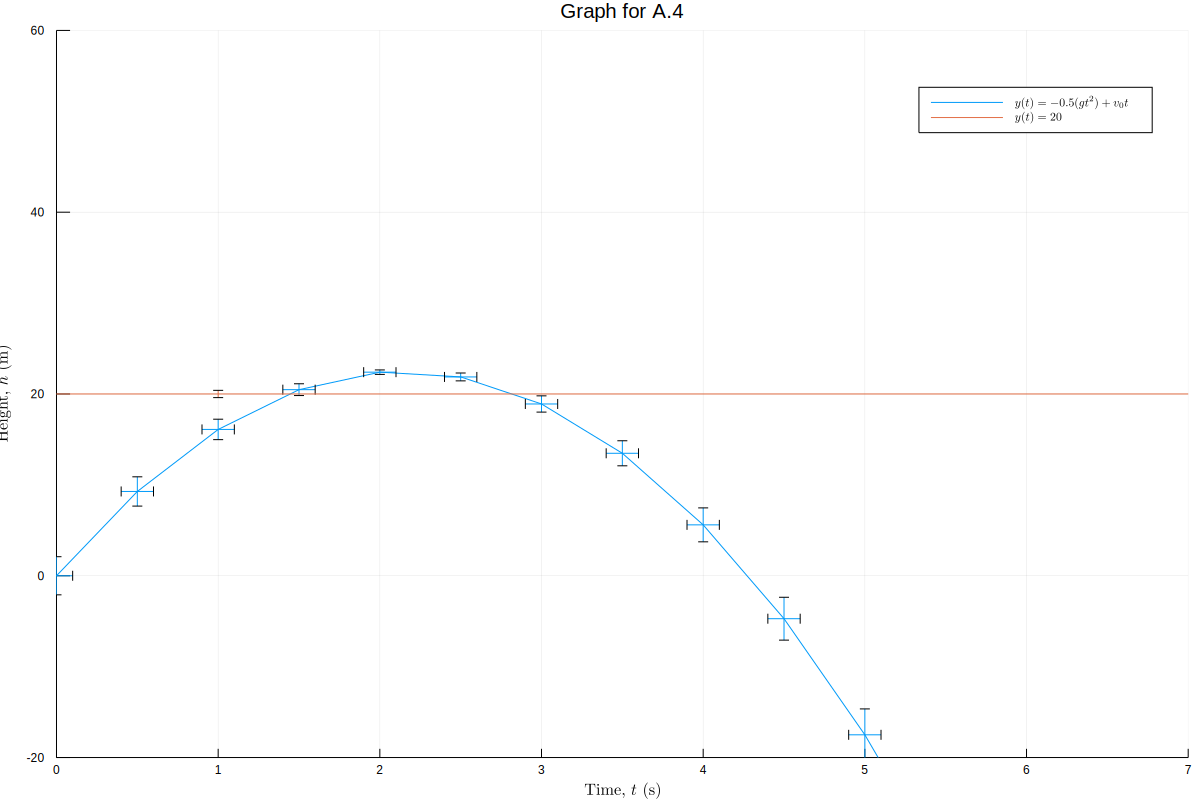

In [3]:
# Code for A.4
thyme = collect(0:0.5:10) # Generate a vector with values from 0 to 10 in increments of 0.5
y(t) = -1/2*g*t^2 + v_0*t # Equation for y(t)
plot(y, [t ± 0.1 for t in thyme], size = (1200, 800), 
                                  legend=true, title = "Graph for A.4",
                                  label=L"y(t) = -0.5(gt^2) + v_0t") # Plot y(t) against time
plot!([h ± 0.4], seriestype="hline", label=L"y(t) = 20") # Line of constant height h
# Plot attributes
xlabel!(latexstring("\\mathrm{Time,} \\ t \\ (\\mathrm{s})"))
ylabel!(latexstring("\\mathrm{Height,} \\ h \\ (\\mathrm{m})"))
xlims!(0, 7)
ylims!(-20, 60)

In [4]:
# Code for A.5
discriminant(a, b, c) = b^2 - 4*a*c # Find the discriminant of a quadratic equation
findRoots(a, b, c) = ( 1 / (2*a) ) * ( (-b) * [1, 1] + sqrt( discriminant(a, b, c) ) * [1, -1] ) # Find the roots of a quadratic equation
findRoots(-1/2*g, v_0, -h); # Find the roots of F(t) = 0

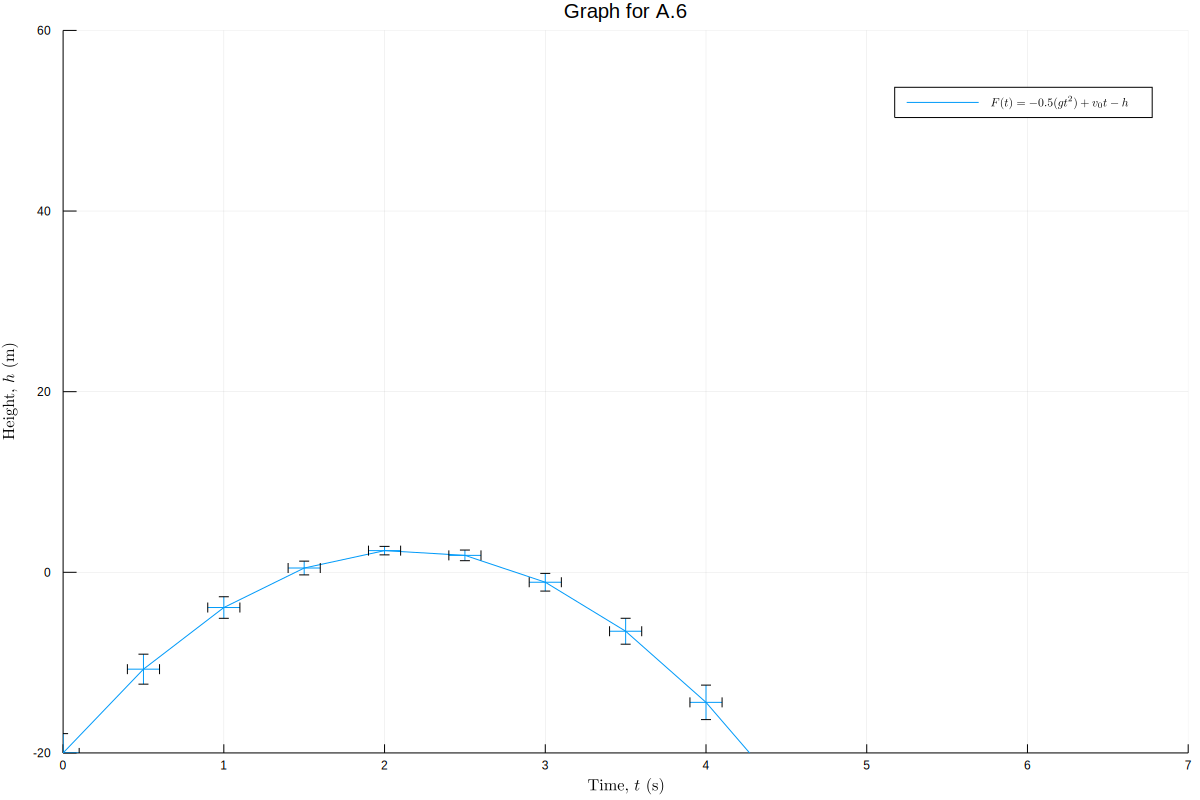

In [5]:
# Code for A.6
thyme = collect(0:0.5:10) # Generate a vector with values from 0 to 10 in increments of 0.5
F(t) = (-1/2) * g * t^2 + v_0 * t - h # Equation for F(t) = 0
plot(F, [t ± 0.1 for t in thyme], size = (1200, 800), 
                                  legend=true, 
                                  title = "Graph for A.6", 
                                  label = L"F(t) = -0.5(gt^2) + v_0t - h") # Plot F(t) = 0
# Plot attributes
xlabel!(latexstring("\\mathrm{Time,} \\ t \\ (\\mathrm{s})"))
ylabel!(latexstring("\\mathrm{Height,} \\ h \\ (\\mathrm{m})"))
xlims!(0, 7)
ylims!(-20, 60)

# B. Blackbody radiation
1. 
   Let $\lambda = \lambda_0 \bar{\lambda}$.  
   So, $\frac{hc}{\lambda k_B T} = \frac{hc}{\lambda_0 \bar{\lambda} k_B T}$.   
   Then, let $\lambda_0 = \frac{k_B T}{hc}$.  
   Hence, our resulting dimensionless equation has the form: $\frac{hc}{\lambda k_B T} = \frac{hc}{\lambda_0 \bar{\lambda} k_B T} = \frac{1}{\bar{\lambda}}$.    
   
   Note: In this part, $\lambda \ne \lambda_0 \bar{\lambda}$.  
   Also, the units of the wavelength, $\lambda$, is metres.  
   Let $u_0 \bar{u} = \frac{8\pi}{\lambda^5} hc$.   
   Then, let $u_0 = \frac{1}{hc}$.  
   Note: The units of $u_0$, $[u_0] = \frac{m^5}{[h][c]}$.  
   Thus, $\bar{u} = \frac{8\pi}{\lambda^5}$  
   
   At long last, the dimensionless equation for blackbody radiation is:
   $\bar{u}(\bar{\lambda}) = \frac{8\pi}{\bar{\lambda^5}} \frac{1}{ \mathrm{exp}(\bar{\lambda^{-1}}) - 1 }$
   
   A plot of $\bar{u}(\bar{\lambda})$ against $\bar{\lambda}$ was then generated using the code below
```julia
wavelengths = collect(0:50:300)
u(λ) = (8*π)/(λ^5) * (1)/(exp(λ^(-1)) - 1)
plot(u, [λ for λ in wavelengths], size = (1200, 800), 
                                  legend = true, 
                                  title = "Graph for B.1", 
                                  label=L"\bar{u}(\bar{\lambda}) = \frac{8\pi}{\bar{\lambda^5}} \frac{1}{ \mathrm{exp}(\bar{\lambda^{-1}}) - 1 }")
xlabel!(latexstring("\\mathrm{Wavelength,} \\ \\bar{\\lambda}"))
ylabel!(latexstring("\\mathrm{Total \\ radiant \\ energy \\ per \\ unit \\ volume,} \\  \\bar{u}(\\bar{\\lambda})"))
```


2. 
   The wavelength, $\lambda_{max}$, at which maximum radiation energy density occurs is given by
   $\frac{\mathrm{d}}{\mathrm{d\lambda}} \left( u(\lambda) \right) = \frac{-10\lambda \ + \ \coth{\frac{1}{2\lambda}} + 1}{\lambda} = 0$   
   
   
3. 
   The code below was used to find the maximum radiation energy. The function $u(\lambda)$ in the code below is the derivative of $\bar{u}(\bar{\lambda})$
   ```julia
   u(λ) = (-10*λ + coth(1/(2*λ)) + 1)/λ
   find_zero(u, (0, 1))
   ```
   
   
4. 
   The total radiant energy per unit volume in dimensionless units to 8 significant figures found by numerically integrating $\bar{u}(\bar{\lambda})$ was determined to be 163.2105 $\pm$ 1.0$\mathrm{e^{-7}}$ in the interval $[0, 201]$. The interval was determined by finding the difference between the total radiant energy to 8 significant figures in the interval $[0, n]$ and $[0, n - s]$ where $n = 51, 101, 151, ... , \infty$ and the step size, $s = 50$. The code below shows the implementation of the method. 
   ```julia
   totalEnergy = 0 # Holds the final total radiant energy per unit volume in dimensionless units along with the error
   step = 50 # Step size
   intervalEnd = 0 # The final interval for which the difference is 0
   for n in Iterators.countfrom(51, step)
       currentStep, error = quadgk(x -> ((8*pi)/x^5)*(1/(exp(1/x) - 1)), 0, n, rtol=1e-8)
       oneStepBack = round(quadgk(x -> ((8*pi)/x^5)*(1/(exp(1/x) - 1)), 0, n - step, rtol=1e-8)[1], sigdigits=8)
       if (round(currentStep[1], sigdigits=8) - oneStepBack) == 0
           totalEnergy = (round(currentStep, sigdigits=8), round(error, sigdigits=1))
           intervalEnd = n
           break
       end
   end
   ```

In [6]:
# Code for B.3
u(λ) = (-10*λ + coth(1/(2*λ)) + 1)/λ
find_zero(u, (0, 1))

# Code for B.4
totalEnergy = 0 # Holds the final total radiant energy per unit volume in dimensionless units along with the error
step = 50 # Step size
intervalEnd = 0 # The final interval for which the difference is 0
for n in Iterators.countfrom(51, step)
    currentStep, error = quadgk(x -> ((8*pi)/x^5)*(1/(exp(1/x) - 1)), 0, n, rtol=1e-8)
    oneStepBack = round(quadgk(x -> ((8*pi)/x^5)*(1/(exp(1/x) - 1)), 0, n - step, rtol=1e-8)[1], sigdigits=8)
    if (round(currentStep[1], sigdigits=8) - oneStepBack) == 0
        totalEnergy = (round(currentStep, sigdigits=8), round(error, sigdigits=1))
        intervalEnd = n
        break
    end
end

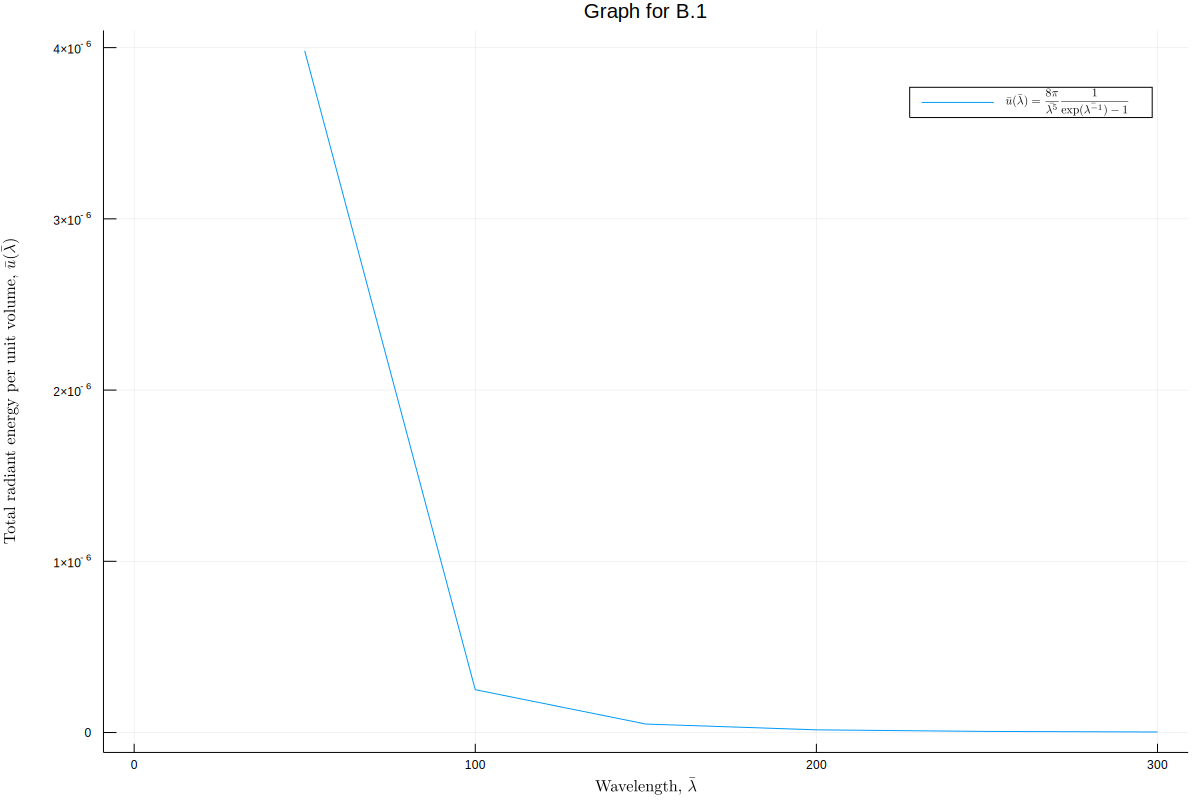

In [7]:
# Code for B.1
wavelengths = collect(0:50:300)
u(λ) = (8*π)/(λ^5) * (1)/(exp(λ^(-1)) - 1)
plot(u, [λ for λ in wavelengths], size = (1200, 800), 
                                  legend = true, 
                                  title = "Graph for B.1", 
                                  label=L"\bar{u}(\bar{\lambda}) = \frac{8\pi}{\bar{\lambda^5}} \frac{1}{ \mathrm{exp}(\bar{\lambda^{-1}}) - 1 }")

xlabel!(latexstring("\\mathrm{Wavelength,} \\ \\bar{\\lambda}"))
ylabel!(latexstring("\\mathrm{Total \\ radiant \\ energy \\ per \\ unit \\ volume,} \\  \\bar{u}(\\bar{\\lambda})"))